In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
nyc = pd.read_csv('NYC.csv')

In [3]:
nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
nyc = nyc.drop(['id','host_id','name','host_name','last_review','neighbourhood_group','neighbourhood'],axis=1)

In [6]:
nyc.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [7]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(5), object(1)
memory usage: 3.4+ MB


In [8]:
nyc['reviews_per_month']

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

In [9]:
#fill null value
df = nyc.fillna(0)

In [10]:
df.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [11]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [12]:
roomtype = pd.DataFrame(columns = ['Private room', 'Entire home/apt', 'Shared room'],index=df.index)
for i in range(len(df)):
    if df['room_type'][i] == 'Private room':
        roomtype['Private room'][i] = 1
        roomtype['Entire home/apt'][i] = 0
        roomtype['Shared room'][i] = 0
    elif df['room_type'][i] == 'Entire home/apt':
        roomtype['Private room'][i] = 0
        roomtype['Entire home/apt'][i] = 1
        roomtype['Shared room'][i] = 0
    else:
        roomtype['Private room'][i] = 0
        roomtype['Entire home/apt'][i] = 0
        roomtype['Shared room'][i] = 1

In [13]:
roomtype.head()

,Private room,Entire home/apt,Shared room
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0


In [14]:
df_1 = pd.concat([df, roomtype], axis=1)
nyc_df = df_1.drop(['room_type'], axis=1)

In [15]:
nyc_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private room,Entire home/apt,Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,1,0
2,40.80902,-73.94190,150,3,0,0.00,1,365,1,0,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,0


In [16]:
#normalise the dataset
from sklearn import preprocessing
a = nyc_df.drop(['price'],axis=1)
x = a.values                                      #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
col=['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','Private room','Entire home/apt','Shared room']
df = pd.DataFrame(x_scaled, columns=col)

In [17]:
df.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private room,Entire home/apt,Shared room
0,0.357393,0.511921,0.000000,0.014308,0.003590,0.015337,1.000000,1.0,0.0,0.0
1,0.614199,0.490469,0.000000,0.071542,0.006496,0.003067,0.972603,0.0,1.0,0.0
2,0.748252,0.569257,0.001601,0.000000,0.000000,0.000000,1.000000,1.0,0.0,0.0
3,0.448496,0.535649,0.000000,0.429253,0.079316,0.000000,0.531507,0.0,1.0,0.0
4,0.722820,0.565324,0.007206,0.014308,0.001709,0.000000,0.000000,0.0,1.0,0.0


In [18]:
X = df
y = nyc_df['price']

**Train test split**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

**Gaussian**

In [20]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)

nb_pred = nb.predict(X_test)

Text(0, 0.5, 'Predicted Y')

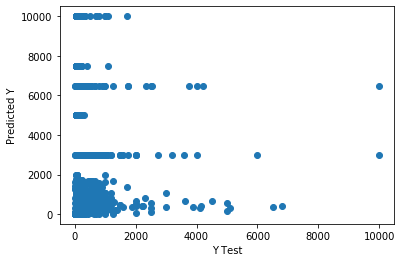

In [21]:
plt.scatter(y_test,nb_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [22]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, nb_pred))
print('MSE:', metrics.mean_squared_error(y_test, nb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, nb_pred)))

MAE: 1101.3581021201173
MSE: 6571338.215011248
RMSE: 2563.462154004082


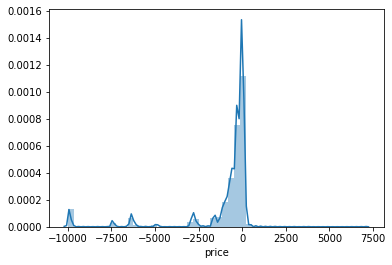

In [23]:
sns.distplot((y_test-nb_pred),bins=50);

**Linear Regression**

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print('Coefficients: \n', lin_reg.coef_)

Coefficients: 
 [  75.92305468 -299.14229994  -78.95571746 -164.34840231 -148.44893093
  -25.96036015   70.80405811  -26.30520346   84.49142414  -58.18622068]


In [26]:
L_pred = lin_reg.predict(X_test)

Text(0, 0.5, 'Predicted Y')

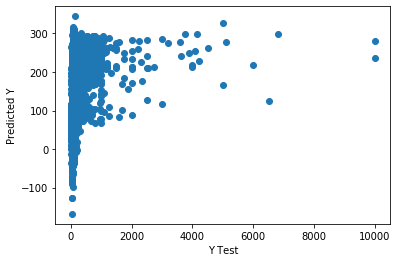

In [27]:
plt.scatter(y_test,L_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [28]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, L_pred))
print('MSE:', metrics.mean_squared_error(y_test, L_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, L_pred)))

MAE: 75.95434765847689
MSE: 55510.51901367337
RMSE: 235.60670409322688


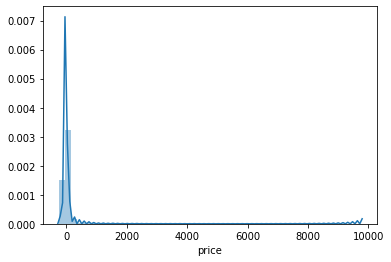

In [29]:
sns.distplot((y_test-L_pred),bins=50);

**Support Vector Machine**

**K Nearest Neighbors**

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

Text(0, 0.5, 'Predicted Y')

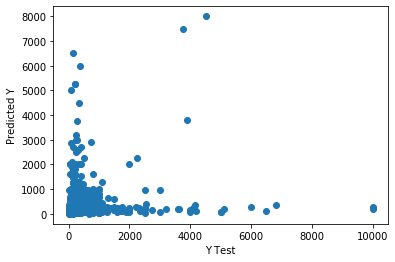

In [31]:
plt.scatter(y_test,knn_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, knn_pred))
print('MSE:', metrics.mean_squared_error(y_test, knn_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_pred)))

MAE: 83.75662962710477
MSE: 79843.68109618925
RMSE: 282.56624196140143


In [33]:
#choosing k value

error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

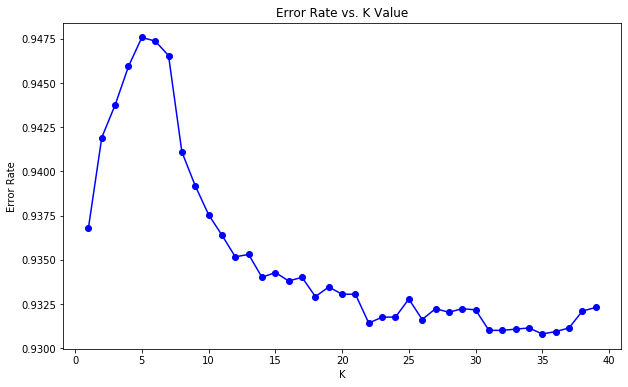

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [36]:
#with k=32
knn = KNeighborsClassifier(n_neighbors=32)

knn.fit(X_train,y_train)
pred_k = knn.predict(X_test)

Text(0, 0.5, 'Predicted Y')

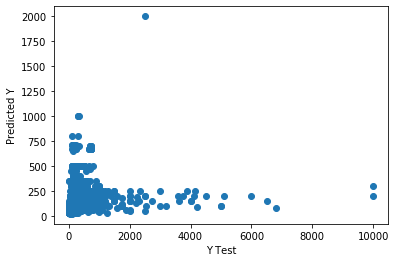

In [37]:
plt.scatter(y_test,pred_k)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_k))
print('MSE:', metrics.mean_squared_error(y_test, pred_k))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_k)))

MAE: 67.59254209557571
MSE: 57875.4197968505
RMSE: 240.57310696927556


**Decision Tree**

In [39]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

Text(0, 0.5, 'Predicted Y')

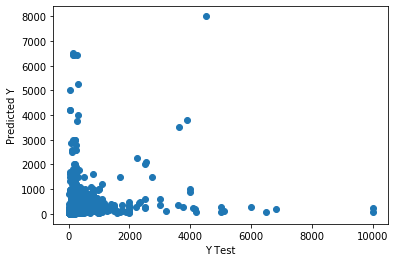

In [40]:
plt.scatter(y_test,dtree_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, dtree_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtree_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtree_pred)))

MAE: 82.98527506987524
MSE: 82036.95146226736
RMSE: 286.42093405033677


**Keras Regression Code**

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [44]:
model = Sequential()

model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [45]:
model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),batch_size=128,epochs=400)

Train on 34226 samples, validate on 14669 samples
Epoch 1/400
34226/34226 [==============================] - 3s 87us/sample - loss: 75884.6291 - val_loss: 71112.5038
Epoch 2/400
34226/34226 [==============================] - 1s 31us/sample - loss: 56065.6257 - val_loss: 58058.3343
Epoch 3/400
34226/34226 [==============================] - 1s 36us/sample - loss: 52692.1442 - val_loss: 56920.8905
Epoch 4/400
34226/34226 [==============================] - 2s 44us/sample - loss: 52141.5955 - val_loss: 56616.9713
Epoch 5/400
34226/34226 [==============================] - 1s 29us/sample - loss: 52006.9588 - val_loss: 56514.2075
Epoch 6/400
34226/34226 [==============================] - 1s 40us/sample - loss: 51938.1578 - val_loss: 56425.5382
Epoch 7/400
34226/34226 [==============================] - 1s 31us/sample - loss: 51861.9538 - val_loss: 56348.2060
Epoch 8/400
34226/34226 [==============================] - 1s 40us/sample - loss: 51800.1670 - val_loss: 56282.2302
Epoch 9/400
34226/3422

34226/34226 [==============================] - 1s 38us/sample - loss: 50694.9707 - val_loss: 54859.3343
Epoch 71/400
34226/34226 [==============================] - 2s 47us/sample - loss: 50688.5597 - val_loss: 54859.8732
Epoch 72/400
34226/34226 [==============================] - 1s 40us/sample - loss: 50690.8933 - val_loss: 54864.0931
Epoch 73/400
34226/34226 [==============================] - 2s 44us/sample - loss: 50684.7821 - val_loss: 54844.5819
Epoch 74/400
34226/34226 [==============================] - 1s 38us/sample - loss: 50661.5201 - val_loss: 54820.3528
Epoch 75/400
34226/34226 [==============================] - 1s 39us/sample - loss: 50648.1454 - val_loss: 54816.2854
Epoch 76/400
34226/34226 [==============================] - 1s 39us/sample - loss: 50656.9384 - val_loss: 54838.1465
Epoch 77/400
34226/34226 [==============================] - 1s 39us/sample - loss: 50636.6692 - val_loss: 54793.8711
Epoch 78/400
34226/34226 [==============================] - 1s 38us/sample - 

Epoch 140/400
34226/34226 [==============================] - 1s 34us/sample - loss: 50088.9898 - val_loss: 54103.7120
Epoch 141/400
34226/34226 [==============================] - 1s 34us/sample - loss: 50107.8101 - val_loss: 54108.1471
Epoch 142/400
34226/34226 [==============================] - 1s 34us/sample - loss: 50087.8555 - val_loss: 54109.1380
Epoch 143/400
34226/34226 [==============================] - 1s 33us/sample - loss: 50080.6758 - val_loss: 54194.2159
Epoch 144/400
34226/34226 [==============================] - 1s 34us/sample - loss: 50108.8991 - val_loss: 54076.0097
Epoch 145/400
34226/34226 [==============================] - 1s 34us/sample - loss: 50073.2881 - val_loss: 54167.0396
Epoch 146/400
34226/34226 [==============================] - 1s 34us/sample - loss: 50082.3385 - val_loss: 54078.8946
Epoch 147/400
34226/34226 [==============================] - 1s 34us/sample - loss: 50068.9732 - val_loss: 54088.7197
Epoch 148/400
34226/34226 [=============================

34226/34226 [==============================] - 1s 33us/sample - loss: 49887.3948 - val_loss: 53897.8900
Epoch 210/400
34226/34226 [==============================] - 1s 34us/sample - loss: 49868.3185 - val_loss: 53892.3568
Epoch 211/400
34226/34226 [==============================] - 2s 44us/sample - loss: 49843.6123 - val_loss: 53900.6519
Epoch 212/400
34226/34226 [==============================] - 1s 40us/sample - loss: 49843.9021 - val_loss: 53845.2163
Epoch 213/400
34226/34226 [==============================] - 1s 39us/sample - loss: 49849.0776 - val_loss: 53832.6331
Epoch 214/400
34226/34226 [==============================] - 1s 39us/sample - loss: 49835.5369 - val_loss: 53843.5782
Epoch 215/400
34226/34226 [==============================] - 1s 36us/sample - loss: 49853.0277 - val_loss: 53907.1191
Epoch 216/400
34226/34226 [==============================] - 1s 38us/sample - loss: 49852.5291 - val_loss: 53893.2775
Epoch 217/400
34226/34226 [==============================] - 1s 37us/s

34226/34226 [==============================] - 1s 38us/sample - loss: 49644.3265 - val_loss: 53720.1287
Epoch 279/400
34226/34226 [==============================] - 1s 40us/sample - loss: 49651.1383 - val_loss: 53693.7011
Epoch 280/400
34226/34226 [==============================] - 1s 35us/sample - loss: 49639.1600 - val_loss: 53686.0376
Epoch 281/400
34226/34226 [==============================] - 1s 43us/sample - loss: 49648.3967 - val_loss: 53732.6836
Epoch 282/400
34226/34226 [==============================] - 1s 41us/sample - loss: 49650.1860 - val_loss: 53664.8917
Epoch 283/400
34226/34226 [==============================] - 2s 50us/sample - loss: 49658.5254 - val_loss: 53728.9337
Epoch 284/400
34226/34226 [==============================] - 2s 46us/sample - loss: 49640.6989 - val_loss: 53681.3614
Epoch 285/400
34226/34226 [==============================] - 2s 49us/sample - loss: 49663.9139 - val_loss: 53654.8137
Epoch 286/400
34226/34226 [==============================] - 2s 46us/s

34226/34226 [==============================] - 1s 34us/sample - loss: 49538.6026 - val_loss: 53587.9363
Epoch 348/400
34226/34226 [==============================] - 1s 35us/sample - loss: 49542.3660 - val_loss: 53560.2249
Epoch 349/400
34226/34226 [==============================] - 1s 36us/sample - loss: 49549.9157 - val_loss: 53604.0334
Epoch 350/400
34226/34226 [==============================] - 1s 37us/sample - loss: 49521.3179 - val_loss: 53577.8502
Epoch 351/400
34226/34226 [==============================] - 1s 34us/sample - loss: 49545.5132 - val_loss: 53575.7473
Epoch 352/400
34226/34226 [==============================] - 1s 34us/sample - loss: 49543.9513 - val_loss: 53576.4062
Epoch 353/400
34226/34226 [==============================] - 1s 34us/sample - loss: 49554.2532 - val_loss: 53638.9335
Epoch 354/400
34226/34226 [==============================] - 1s 38us/sample - loss: 49535.1868 - val_loss: 53586.9374
Epoch 355/400
34226/34226 [==============================] - 1s 38us/s

In [46]:
losses = pd.DataFrame(model.history.history)

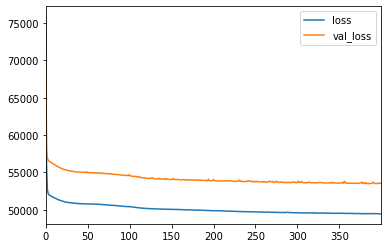

In [47]:
losses.plot()

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

nn_pred = model.predict(X_test)

In [49]:
mean_absolute_error(y_test,nn_pred)

69.8521074280351

In [50]:
np.sqrt(mean_squared_error(y_test,nn_pred))

231.45409971827561

In [51]:
explained_variance_score(y_test,nn_pred)

0.12454802421440381

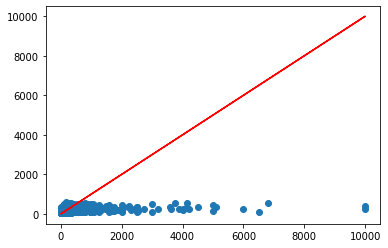

In [54]:
# predictions
plt.scatter(y_test,nn_pred)
plt.plot(y_test,y_test,'r')